# Content analysis
## Set-up, clean-up

Inspired by: https://github.com/chuachinhon/twitter_state_trolls_cch


In [2]:
# import data
import pandas as pd
en_df = pd.read_csv('data/english_preprocessed_simplified.csv')

#df1 = pd.read_csv('data/english_preprocessed.csv')
#df2 = pd.read_csv('data/english_preprocessed_08_26.csv')
#en_df = pd.concat([df1, df2])
#zh_df = pd.read_csv('data/chinese_preprocessed.csv')

In [3]:
en_df

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags,text_clean
0,0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN,all parties have reached consensus on a draft ...
1,1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN,china s railway system is expected to reach 14...
2,2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether,china has exported over 50 billion masks since...
3,3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN,rt spokespersonchn not the first time to bas...
4,4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN,rt spokespersonchn that what does not kill y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26160,39325,1298391186151837696,1598395556,2020-08-25 22:45:56,ChinaDaily,#ChinaStory Look at these kids practicing thei...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/ext_tw_video_thumb/12983...,video,67,90,720,720,fit,NaN,ChinaStory,chinastory look at these kids practicing thei...
26161,39326,1298395229096206339,1598396520,2020-08-25 23:02:00,globaltimesnews,Chinese Valentine’s day proposal: Holding a bu...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EgQEQ5SU0AAEqOo.jpg,video,239,262,480,270,fit,NaN,NaN,chinese valentine s day proposal holding a bu...
26162,39328,1298399770692780032,1598397603,2020-08-25 23:20:03,globaltimesnews,#Opinion: Italy and #China can expand beyond i...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EgTXteiXkAE0kjH.jpg,photo,238,261,1200,720,fit,fabiomassimos,Opinion; China; Italy,opinion italy and china can expand beyond i...
26163,39330,1298404806072184837,1598398803,2020-08-25 23:40:03,globaltimesnews,#India's overconfidence in its economic streng...,low,0.0,NaN,NaN,...,https://pbs.twimg.com/media/EgTcSkFXgAM2ld9.jpg,photo,243,266,1200,720,fit,NaN,India; COVID19,india s overconfidence in its economic streng...


In [3]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26165 entries, 0 to 26164
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26165 non-null  int64  
 1   id                           26165 non-null  int64  
 2   time                         26165 non-null  int64  
 3   created_at                   26165 non-null  object 
 4   from_user_name               26165 non-null  object 
 5   text                         26165 non-null  object 
 6   filter_level                 26165 non-null  object 
 7   possibly_sensitive           20365 non-null  float64
 8   withheld_copyright           0 non-null      float64
 9   withheld_scope               0 non-null      float64
 10  truncated                    0 non-null      float64
 11  retweet_count                26165 non-null  int64  
 12  favorite_count               26165 non-null  int64  
 13  lang            

In [5]:
en_df.from_user_name.unique()

array(['ChinaEUMission', 'zlj517', 'globaltimesnews', 'ChinaDaily',
       'SpokespersonCHN', 'euchinahub', 'AmbLiuXiaoMing',
       'ChineseEmbinUK', 'AmbassadeChine', 'ChinaEmbGermany',
       'overseaschina', 'PDChinese'], dtype=object)

In [30]:
# setting up matplotlib settings
# Source: https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as font_manager

# font
font_dirs = ['/Library/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DIN Condensed Bold'

# set matplotlib aesthetics
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

sns.set(rc={
            'axes.axisbelow': False,
            'axes.edgecolor': 'lightgrey',
            'axes.facecolor': 'None',
            'axes.grid': False,
            'axes.labelcolor': 'dimgrey',
            'axes.spines.right': False,
            'axes.spines.top': False,
            'figure.facecolor': 'white',
            'lines.solid_capstyle': 'round',
            'patch.edgecolor': 'w',
            'patch.force_edgecolor': True,
            'text.color': 'dimgrey',
            'xtick.bottom': False,
            'xtick.color': 'dimgrey',
            'xtick.direction': 'out',
            'xtick.top': False,
            'ytick.color': 'dimgrey',
            'ytick.direction': 'out',
            'ytick.left': False,
            'ytick.right': False,
            'savefig.dpi': 800})

#plt.rcParams["savefig.dpi"] = 'figure'
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

### Dataset description

In [5]:
user_freq = pd.DataFrame(en_df.groupby(['from_user_name', 'lang'])['created_at'].count()).reset_index()
user_freq = user_freq[user_freq['lang'].isin(['en', 'zh', 'fr'])]
user_freq

,from_user_name,lang,created_at
0,AmbLiuXiaoMing,en,1465
1,AmbassadeChine,en,94
2,ChinaDaily,en,8128
3,ChinaEUMission,en,340
4,ChinaEmbGermany,en,56
5,ChineseEmbinUK,en,477
6,PDChinese,en,8
7,SpokespersonCHN,en,342
8,euchinahub,en,550
9,globaltimesnews,en,13309


In [7]:
import datetime

en_df['month'] = pd.DatetimeIndex(en_df['created_at']).month
en_df['date'] = pd.DatetimeIndex(en_df['created_at']).date
en_df.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags,text_clean,month,date
0,0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,NaN,NaN,...,281,304,635,357,fit,WHO,NaN,all parties have reached consensus on a draft ...,5,2020-05-19
1,1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,NaN,NaN,...,269,292,512,341,fit,NaN,NaN,china s railway system is expected to reach 14...,5,2020-05-19
2,2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,NaN,NaN,...,250,273,2048,1366,fit,NaN,StrongerTogether,china has exported over 50 billion masks since...,5,2020-05-19
3,3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN,rt spokespersonchn not the first time to bas...,5,2020-05-19
4,4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,NaN,NaN,...,77,100,1080,595,fit,SpokespersonCHN,NaN,rt spokespersonchn that what does not kill y...,5,2020-05-19


In [32]:
date_freq = pd.DataFrame(en_df.groupby(['date', 'month'])['created_at'].count()).reset_index()
date_freq

,date,month,created_at
0,2020-05-19,5,10
1,2020-05-20,5,201
2,2020-05-21,5,297
3,2020-05-22,5,268
4,2020-05-23,5,148
...,...,...,...
94,2020-08-21,8,233
95,2020-08-22,8,125
96,2020-08-23,8,149
97,2020-08-24,8,301


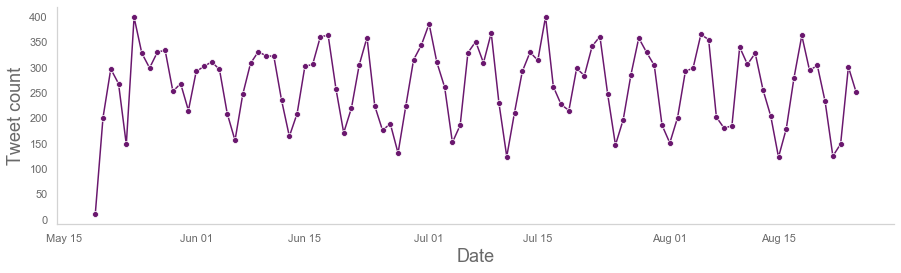

In [67]:
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(15, 4))
ax = sns.lineplot(x="date", y="created_at", data=date_freq, marker='o', palette="inferno_r")
ax.set(xlabel='Date', ylabel='Tweet count')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.savefig('plots/english/date_distribution_count.png', bbox_inches='tight')

## Visualisations

### Frequent terms
#### English

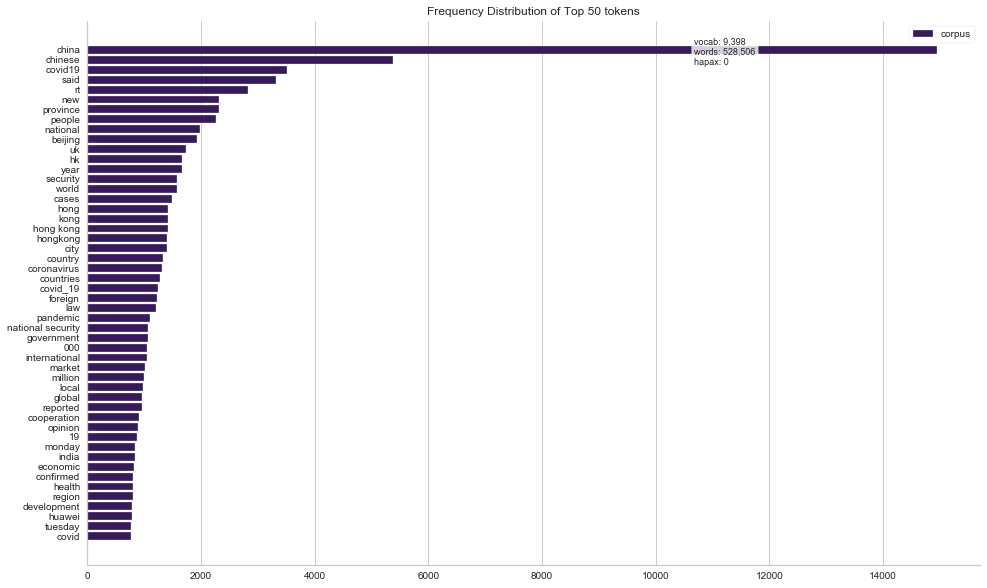

In [14]:
# Visualize frequent terms
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
from palettable.matplotlib import Inferno_20


# clean text
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(en_df['text_clean'].dropna())
features = vect.get_feature_names()

plt.figure(figsize=(16,10))
visualiser = FreqDistVisualizer(features=features, show = False, color='#371A5C')
visualiser.fit(docs)

visualiser.poof('plots/english/top50.png')
#visualiser.poof()

#plt.show()
#plt.savefig('plots/english/top50.png')

#### Chinese

You should consider upgrading via the '/Users/anitakurm/anaconda3/envs/text_to_x/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/yellowbrick/base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20896 missing fro

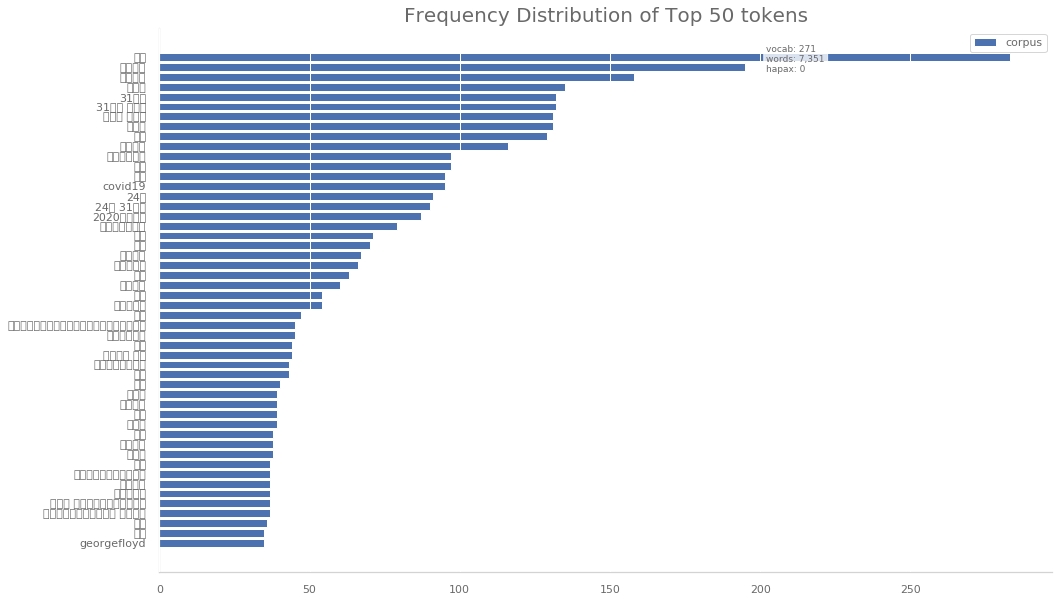

In [46]:
# Visualize frequent terms
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer

# change font to chinese
font_dirs = ['/Library/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'Noto Sans SC'

# clean text
vect = CountVectorizer(min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(zh_df['text_clean'].dropna())
features = vect.get_feature_names()

plt.figure(figsize=(16,10))
visualiser = FreqDistVisualizer(features=features, show = False)
visualiser.fit(docs)

visualiser.poof('plots/chinese/top50.png')

## Topic modelling

### Coherence scores, hyperparameter tuning and evaluation

In [16]:
# csv generated from lda_tuning.py 
coherence = pd.read_csv('lda_tuning_results_new.csv')
coherence

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.384289
1,75% Corpus,4,0.01,0.31,0.394966
2,75% Corpus,4,0.01,0.61,0.387209
3,75% Corpus,4,0.01,0.9099999999999999,0.372381
4,75% Corpus,4,0.01,symmetric,0.392948
...,...,...,...,...,...
655,100% Corpus,14,asymmetric,0.01,0.391682
656,100% Corpus,14,asymmetric,0.31,0.383840
657,100% Corpus,14,asymmetric,0.61,0.436639
658,100% Corpus,14,asymmetric,0.9099999999999999,0.520670


In [17]:
k_scores = coherence.loc[(coherence.Alpha=='0.01') & (coherence.Beta=='0.01')]
k_scores

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.384289
30,75% Corpus,5,0.01,0.01,0.379701
60,75% Corpus,6,0.01,0.01,0.385032
90,75% Corpus,7,0.01,0.01,0.378771
120,75% Corpus,8,0.01,0.01,0.391953
150,75% Corpus,9,0.01,0.01,0.396848
180,75% Corpus,10,0.01,0.01,0.396490
210,75% Corpus,11,0.01,0.01,0.398968
240,75% Corpus,12,0.01,0.01,0.384920
270,75% Corpus,13,0.01,0.01,0.372561


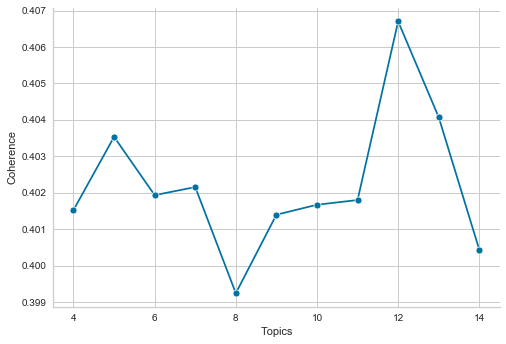

In [37]:
#ax = sns.lineplot(x="Topics", y="Coherence", data=k_scores, marker='o', ci = None)
ax = sns.lineplot(x="Topics", y="Coherence", data=coherence, marker='o', ci = None)

In [38]:
# Save the full figure...
ax.figure.savefig('plots/english/coherence_plot.png')

We can see that coherence is highest with 12 topics. Let's choose alpha and beta parameters based on highest coherence value.

In [39]:
topics_12 = coherence.loc[(coherence.Topics==12)]
topics_12.loc[topics_12['Coherence'].idxmax()]

Validation_Set           100% Corpus
Topics                            12
Alpha                     asymmetric
Beta              0.9099999999999999
Coherence                   0.526034
Name: 598, dtype: object

We can see that best coherence with number of topics = 12 was achieved with alpha = asymmetric and beta = 0.91

### Best model application

In [21]:
# pyLDAvis
import gensim
import pyLDAvis.gensim
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models, similarities


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join([ch for ch in stop_free if ch not in exclude])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


# some additional pre-processing is needed
sample_text = en_df['text_clean']
state_text = list(sample_text.values)

text_clean = [clean(doc).split() for doc in state_text]
dictionary = corpora.Dictionary(text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean]

In [36]:
# I'm keeping the number of topics small so that they would be easier to discern
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix,
               num_topics=12, 
               id2word=dictionary, 
               passes=10,
               alpha="asymmetric",
               eta=0.91, 
               random_state=3)

In [40]:
tfidf = models.TfidfModel(doc_term_matrix)
doc_tfidf = tfidf[doc_term_matrix]
doc_lda = ldamodel[doc_tfidf]

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=True)
panel2= pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=False)

In [41]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2        5.310529  171.049652       1        1  42.651497
11     136.304657   23.800941       2        1  13.239068
0      101.190552  -84.985191       3        1   9.112438
1     -106.824867  148.841736       4        1   7.234636
3      -44.365761   78.632721       5        1   5.950561
4       43.884090   73.474022       6        1   4.204305
5      114.093971  135.933029       7        1   3.707485
6     -119.727142  -72.077179       8        1   3.315760
7      -49.518208   -9.617325       9        1   2.998755
8     -141.938736   40.055210      10        1   2.737275
9       38.731544  -14.776019      11        1   2.517582
10     -10.944340 -107.193344      12        1   2.330640, topic_info=                Term        Freq       Total Category  logprob  loglift
29             china  581.000000  581.000000  Default  30.0000  30.0000
96                 u  340.000000  340.000000  Default  29.0000  29.0000
152          covid19   84.000000   84.000000  Default  28.0000  28.0000
185         province   40.000000   40.000000  Default  27.0000  27.0000
200          chinese  233.000000  233.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
11216         poison    0.076616    0.653251  Topic12  -8.9611   1.6159
156    granddaughter    0.058853    0.471011  Topic12  -9.2249   1.6792
25105     sentencing    0.057577    0.452477  Topic12  -9.2468   1.6974
24750       massacre    0.058184    0.591329  Topic12  -9.2363   1.4403
12617         lovely    0.059871    0.806134  Topic12  -9.2077   1.1590

[567 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
24         3  0.252872          000
24         4  0.674327          000
51         3  0.168473            1
51         4  0.786206            1
255        4  0.801803           14
...      ...       ...          ...
760        4  0.962037         yuan
14498      5  0.876896  zhangheqing
722        2  0.875119         zhao
3003       5  0.847483       zlj517
1879       5  0.991516          zoo

[556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 12, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11])

In [42]:
panel2

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0        5.310529  171.049652       1        1   9.112382
1      136.304657   23.800941       2        1   7.229912
2      101.190552  -84.985191       3        1  42.656055
3     -106.824867  148.841736       4        1   5.945065
4      -44.365761   78.632721       5        1   4.204301
5       43.884090   73.474022       6        1   3.707478
6      114.093971  135.933029       7        1   3.315758
7     -119.727142  -72.077179       8        1   2.998754
8      -49.518208   -9.617325       9        1   2.737273
9     -141.938736   40.055210      10        1   2.517582
10      38.731544  -14.776019      11        1   2.330639
11     -10.944340 -107.193344      12        1  13.244801, topic_info=         Term        Freq       Total Category  logprob  loglift
29      china  581.000000  581.000000  Default  30.0000  30.0000
96          u  340.000000  340.000000  Default  29.0000  29.0000
152   covid19   84.000000   84.000000  Default  28.0000  28.0000
185  province   40.000000   40.000000  Default  27.0000  27.0000
200   chinese  233.000000  233.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
168        uk   13.446973   65.730133  Topic12  -5.5309   0.4348
31    country   15.494780  122.505135  Topic12  -5.3891  -0.0461
291       one   11.148520   55.903904  Topic12  -5.7183   0.4092
93     people   10.917089   72.274323  Topic12  -5.7393   0.1314
384       two    9.088894   44.007793  Topic12  -5.9226   0.4443

[566 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
24         1  0.252988          000
24         2  0.674634          000
51         1  0.168563            1
51         2  0.786625            1
255        2  0.802260           14
...      ...       ...          ...
760        2  0.962639         yuan
14498      4  0.877654  zhangheqing
722       12  0.874771         zhao
3003       4  0.848194       zlj517
1879       4  0.992403          zoo

[555 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [43]:
#save 
pyLDAvis.save_html(panel2, 'plots/english/12_topics_english.html')

In [44]:
#print(panel.topic_order)
print(panel2.topic_order)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


#### Word clouds

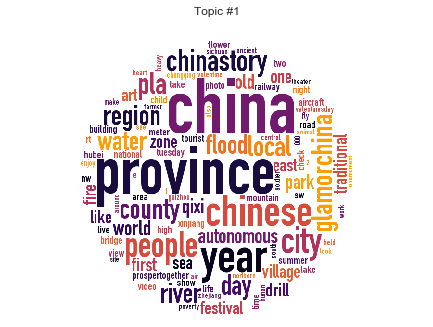

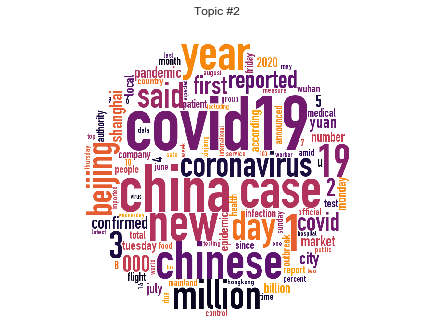

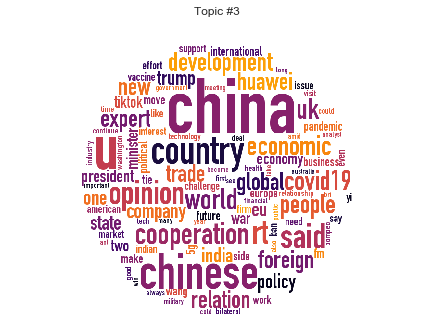

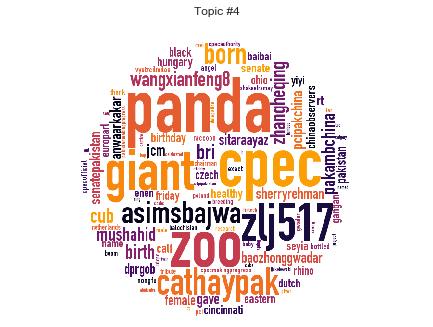

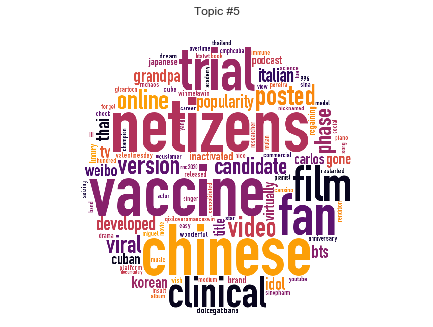

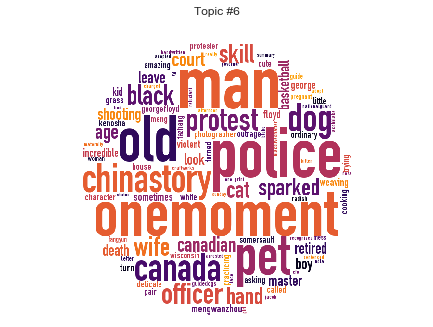

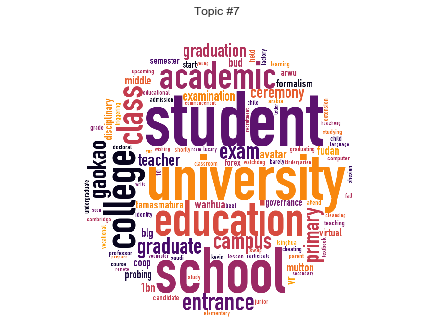

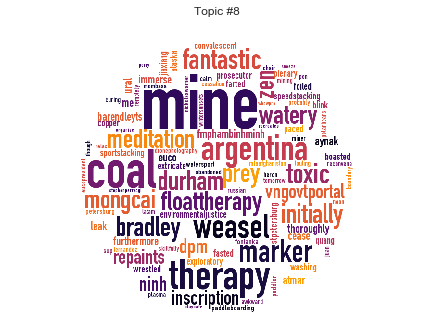

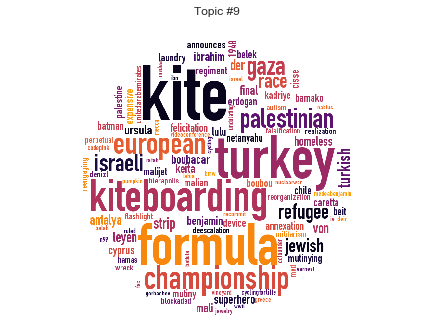

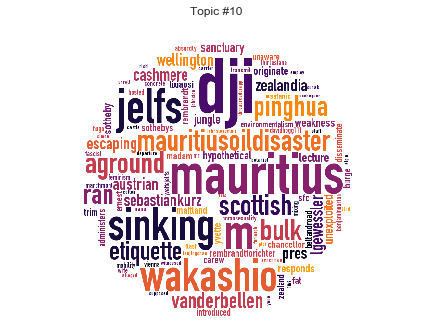

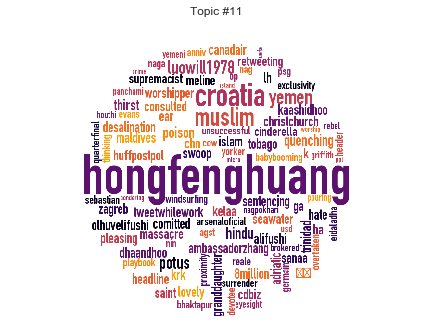

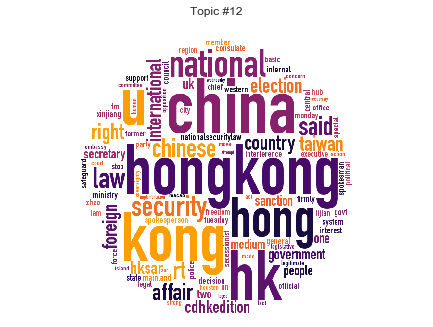

In [54]:
# lda is assumed to be the variable holding the LdaModel object
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from palettable.lightbartlein.diverging import BlueDarkOrange18_5
from palettable.matplotlib import Inferno_20
import random
from PIL import Image
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Inferno_20.colors[random.randint(1,15)])

font_path = "/Library/Fonts/DIN Condensed Bold.ttf"
icon_path = "utils/circle.png"

mask = np.array(Image.open(icon_path))

for t in range(ldamodel.num_topics):
    plt.figure()
    # wordcloud = WordCloud(background_color="white", max_font_size=60, width=800, height=400)
    wc = WordCloud(font_path=font_path, background_color="white", max_words=100, mask = mask,
                   stopwords=STOPWORDS,
                   max_font_size=160,
                   random_state=42,
                   width=800, height=400)
    plt.imshow(wc.fit_words(dict(ldamodel.show_topic(t, 200))).recolor(color_func=color_func, random_state=3))
    #wc.recolor(color_func=color_func)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    #plt.show()
    plt.savefig(f"plots/english/wordclouds/topic_{t+1}.png", dpi = 800)
    


In [67]:
for t in range(ldamodel.num_topics):
    print("Topic #" + str(t+1))
    str1 = ", "
    pairs = ldamodel.show_topic(t, 15)
    words = [pair[0] for pair in pairs]
    print(str1.join(words))

Topic #1
china, province, year, chinese, city, people, chinastory, pla, glamorchina, county, local, region, river, day, water
Topic #2
covid19, china, case, new, chinese, 1, year, 19, million, day, 3, coronavirus, said, beijing, reported
Topic #3
china, u, chinese, country, said, rt, opinion, cooperation, world, uk, economic, covid19, people, development, expert
Topic #4
panda, cpec, zoo, giant, zlj517, cathaypak, asimsbajwa, born, wangxianfeng8, cub, bri, zhangheqing, birth, mushahid, pakambchina
Topic #5
netizens, vaccine, chinese, trial, fan, film, clinical, posted, video, online, version, viral, phase, candidate, developed
Topic #6
man, police, onemoment, old, pet, chinastory, canada, dog, protest, officer, black, skill, wife, sparked, hand
Topic #7
student, university, school, education, college, academic, class, entrance, gaokao, campus, exam, graduate, primary, graduation, teacher
Topic #8
mine, coal, therapy, argentina, weasel, marker, toxic, fantastic, initially, bradley, durh

In [68]:
panel2.topic_info

,Term,Freq,Total,Category,logprob,loglift
29,china,581.000000,581.000000,Default,30.0000,30.0000
96,u,340.000000,340.000000,Default,29.0000,29.0000
152,covid19,84.000000,84.000000,Default,28.0000,28.0000
185,province,40.000000,40.000000,Default,27.0000,27.0000
200,chinese,233.000000,233.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
168,uk,13.446973,65.730133,Topic12,-5.5309,0.4348
31,country,15.494780,122.505135,Topic12,-5.3891,-0.0461
291,one,11.148520,55.903904,Topic12,-5.7183,0.4092
93,people,10.917089,72.274323,Topic12,-5.7393,0.1314


### Chinese

See here for word cloud in chinese: https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html

## Drafts
### Cluster analysis

NB!! Change to clean text variables; Change HDBScan parameters!

In [ ]:
# general prep
real_clean = en_df['text']
corpus_clean = list(real_clean.values)
tfidf = TfidfVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs_clean = tfidf.fit_transform(corpus_clean)

In [ ]:
# K-Means
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=10)
clusters.fit(docs_clean)
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs_clean, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()
plt.show()


In [ ]:
# HDBScan
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(docs_clean)
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs_clean, ["c{}".format(c) for c in clusterer.labels_])
tsne.poof()
plt.show()